# IMPORTS

In [1]:
from datetime import datetime
import requests
from json import dumps, loads
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# API CONNECTION, DATE INTERVAL and RAW DATA

In [2]:
urlGetAllPlayers = 'https://balldontlie.io/api/v1/stats'


def get_all_players_from_api(params):
    try:
        all_data_players_list = []
        all_data_players = requests.get(urlGetAllPlayers, params=params)
        data_feched = loads(all_data_players.text)
        all_data_players_list.extend(data_feched['data'])
        metadata_all_players = data_feched['meta']
        for n in range(metadata_all_players['next_page'], metadata_all_players['total_pages'] + 1):
            params['page'] = n
            all_data_players = requests.get(urlGetAllPlayers, params=params)
            data_feched = loads(all_data_players.text)
            all_data_players_list.extend(data_feched['data'])
            metadata_all_players = data_feched['meta']
            print(f"current_page: {metadata_all_players['current_page']}, next_page: {metadata_all_players['next_page']}, total_pages: {metadata_all_players['total_pages']}")

        return all_data_players_list
    except Exception as err:
        print(str(err))


if __name__ == "__main__":
    start_date = input("Please type the start date in the following format: 'YYYY-MM-DD': ")
    end_date = input("Please type the end date in the following format: 'YYYY-MM-DD': ")
    data_fetched_players = get_all_players_from_api(params={'start_date': start_date, 'end_date': end_date, 'per_page': 100})

Please type the start date in the following format: 'YYYY-MM-DD': 2022-12-01
Please type the end date in the following format: 'YYYY-MM-DD': 2022-12-31
current_page: 2, next_page: 3, total_pages: 74
current_page: 3, next_page: 4, total_pages: 74
current_page: 4, next_page: 5, total_pages: 74
current_page: 5, next_page: 6, total_pages: 74
current_page: 6, next_page: 7, total_pages: 74
current_page: 7, next_page: 8, total_pages: 74
current_page: 8, next_page: 9, total_pages: 74
current_page: 9, next_page: 10, total_pages: 74
current_page: 10, next_page: 11, total_pages: 74
current_page: 11, next_page: 12, total_pages: 74
current_page: 12, next_page: 13, total_pages: 74
current_page: 13, next_page: 14, total_pages: 74
current_page: 14, next_page: 15, total_pages: 74
current_page: 15, next_page: 16, total_pages: 74
current_page: 16, next_page: 17, total_pages: 74
current_page: 17, next_page: 18, total_pages: 74
current_page: 18, next_page: 19, total_pages: 74
current_page: 19, next_page: 2

# DATA CLEANING

In [3]:
df = pd.DataFrame(data_fetched_players)
df.head()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,12410346,3,0,0,0.00,1,0,0.000,2,0,...,"{'id': 857679, 'date': '2022-12-01T00:00:00.00...",09,1,1,"{'id': 251, 'first_name': 'Cory', 'height_feet...",0,1,0,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",1
1,12410343,0,0,0,0.00,0,0,0.000,0,0,...,"{'id': 857679, 'date': '2022-12-01T00:00:00.00...",00,0,0,"{'id': 128, 'first_name': 'Hamidou', 'height_f...",0,0,0,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",0
2,12410337,3,0,9,0.25,4,1,0.333,12,4,...,"{'id': 857679, 'date': '2022-12-01T00:00:00.00...",37,3,2,"{'id': 3547267, 'first_name': 'Isaiah', 'heigh...",9,12,0,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",1
3,12410338,2,0,9,0.50,2,1,0.700,10,7,...,"{'id': 857679, 'date': '2022-12-01T00:00:00.00...",34,4,3,"{'id': 24, 'first_name': 'Marvin', 'height_fee...",19,13,1,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",1
4,12410339,0,0,0,1.00,2,2,1.000,2,2,...,"{'id': 857679, 'date': '2022-12-01T00:00:00.00...",07,0,1,"{'id': 17896071, 'first_name': 'Isaiah', 'heig...",6,0,0,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",1


### Starting Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7399 non-null   int64  
 1   ast       7399 non-null   int64  
 2   blk       7399 non-null   int64  
 3   dreb      7399 non-null   int64  
 4   fg3_pct   7132 non-null   float64
 5   fg3a      7399 non-null   int64  
 6   fg3m      7399 non-null   int64  
 7   fg_pct    7393 non-null   float64
 8   fga       7399 non-null   int64  
 9   fgm       7399 non-null   int64  
 10  ft_pct    6570 non-null   float64
 11  fta       7399 non-null   int64  
 12  ftm       7399 non-null   int64  
 13  game      7399 non-null   object 
 14  min       7399 non-null   object 
 15  oreb      7399 non-null   int64  
 16  pf        7399 non-null   int64  
 17  player    7399 non-null   object 
 18  pts       7399 non-null   int64  
 19  reb       7399 non-null   int64  
 20  stl       7399 non-null   int6

## PLAYER, GAME and TEAM'S DATA

In [5]:
df_player = df["player"].apply(pd.Series)
df_player = pd.DataFrame(df_player)
df_player.head()

,id,first_name,height_feet,height_inches,last_name,position,team_id,weight_pounds
0,251,Cory,6.0,3.0,Joseph,G,9,193.0
1,128,Hamidou,6.0,5.0,Diallo,G,9,198.0
2,3547267,Isaiah,NaN,NaN,Stewart,F-C,9,NaN
3,24,Marvin,6.0,11.0,Bagley III,F,9,234.0
4,17896071,Isaiah,NaN,NaN,Livers,F,9,NaN


In [6]:
df_game = df["game"].apply(pd.Series)
df_game = pd.DataFrame(df_game)
df_game.head()

,id,date,home_team_id,home_team_score,period,postseason,season,status,time,visitor_team_id,visitor_team_score
0,857679,2022-12-01T00:00:00.000Z,9,131,5,False,2022,Final,Final,7,125
1,857679,2022-12-01T00:00:00.000Z,9,131,5,False,2022,Final,Final,7,125
2,857679,2022-12-01T00:00:00.000Z,9,131,5,False,2022,Final,Final,7,125
3,857679,2022-12-01T00:00:00.000Z,9,131,5,False,2022,Final,Final,7,125
4,857679,2022-12-01T00:00:00.000Z,9,131,5,False,2022,Final,Final,7,125


In [7]:
df_team = df["team"].apply(pd.Series)
df_team = pd.DataFrame(df_team)
df_team.head()

,id,abbreviation,city,conference,division,full_name,name
0,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
1,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
2,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
3,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
4,9,DET,Detroit,East,Central,Detroit Pistons,Pistons


### Preliminary information

In [8]:
df_game.info()
df_player.info()
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  7399 non-null   int64 
 1   date                7399 non-null   object
 2   home_team_id        7399 non-null   int64 
 3   home_team_score     7399 non-null   int64 
 4   period              7399 non-null   int64 
 5   postseason          7399 non-null   bool  
 6   season              7399 non-null   int64 
 7   status              7399 non-null   object
 8   time                7399 non-null   object
 9   visitor_team_id     7399 non-null   int64 
 10  visitor_team_score  7399 non-null   int64 
dtypes: bool(1), int64(7), object(3)
memory usage: 585.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id       

### Player Data

#### Drop Height and Weight columns from the Player DF due to lack of data

In [9]:
df_player = df_player.drop(['height_feet', 'height_inches', 'weight_pounds', 'id', 'team_id'], axis = 1)

#### Making a Full Name column

In [10]:
df_player['full_name'] = df_player['first_name'] + ' ' + df_player['last_name']
df_player = df_player.drop(['first_name', 'last_name'], axis = 1)

### Team Data

#### Drop full_name from The Team DF due to redundancy

In [11]:
df_team = df_team.drop(['full_name'], axis = 1)

#### List of Teams by id

In [12]:
df_team.groupby('id').first()

,abbreviation,city,conference,division,name
id,,,,,
1,ATL,Atlanta,East,Southeast,Hawks
2,BOS,Boston,East,Atlantic,Celtics
3,BKN,Brooklyn,East,Atlantic,Nets
4,CHA,Charlotte,East,Southeast,Hornets
5,CHI,Chicago,East,Central,Bulls
6,CLE,Cleveland,East,Central,Cavaliers
7,DAL,Dallas,West,Southwest,Mavericks
8,DEN,Denver,West,Northwest,Nuggets
9,DET,Detroit,East,Central,Pistons


In [13]:
df_team = df_team.drop(['id'], axis = 1)

### Game Data

#### Changing teams' id for the abbreviation

In [14]:
team_dict = {1: 'ATL', 2: 'BOS',3: 'BKN', 4: 'CHA',5: 'CHI', 6: 'CLE',7: 'DAL', 8: 'DEN',9: 'DET',10: 'GSW',11: 'HOU',12: 'IND', 13: 'LAC', 14: 'LAL', 15: 'MEM', 16: 'MIA', 17: 'MIL', 18: 'MIN', 19: 'NOP', 20: 'NYK', 21: 'OKC', 22: 'ORL', 23: 'PHI', 24: 'PHX', 25: 'POR', 26 : 'SAC', 27 : 'SAS', 28 : 'TOR', 29 : 'UTA', 30 : 'WAS'}
df_game['home_team'] =  df_game['home_team_id'].apply(lambda x: team_dict[x])
df_game['visitor_team'] =  df_game['visitor_team_id'].apply(lambda x: team_dict[x])

In [15]:
df_game = df_game.drop(['home_team_id', 'visitor_team_id', 'period', 'status', 'time', 'id'], axis = 1)

### Main DF

#### Drop dicts and id columns from the main DF

In [16]:
df = df.drop(['game', 'player', 'team', 'id'], axis = 1)
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
0,3,0,0,0.00,1,0,0.000,2,0,0.000,0,0,09,1,1,0,1,0,1
1,0,0,0,0.00,0,0,0.000,0,0,0.000,0,0,00,0,0,0,0,0,0
2,3,0,9,0.25,4,1,0.333,12,4,NaN,0,0,37,3,2,9,12,0,1
3,2,0,9,0.50,2,1,0.700,10,7,0.667,6,4,34,4,3,19,13,1,1
4,0,0,0,1.00,2,2,1.000,2,2,0.000,0,0,07,0,1,6,0,0,1


### Changing mins from object to float

In [17]:
df['min'] = df['min'].astype(float)

## Join Player, Team and Game DFs

In [18]:
df = pd.concat([df,df_player,df_team,df_game], axis = 1)

In [19]:
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,conference,division,name,date,home_team_score,postseason,season,visitor_team_score,home_team,visitor_team
0,3,0,0,0.00,1,0,0.000,2,0,0.000,...,East,Central,Pistons,2022-12-01T00:00:00.000Z,131,False,2022,125,DET,DAL
1,0,0,0,0.00,0,0,0.000,0,0,0.000,...,East,Central,Pistons,2022-12-01T00:00:00.000Z,131,False,2022,125,DET,DAL
2,3,0,9,0.25,4,1,0.333,12,4,NaN,...,East,Central,Pistons,2022-12-01T00:00:00.000Z,131,False,2022,125,DET,DAL
3,2,0,9,0.50,2,1,0.700,10,7,0.667,...,East,Central,Pistons,2022-12-01T00:00:00.000Z,131,False,2022,125,DET,DAL
4,0,0,0,1.00,2,2,1.000,2,2,0.000,...,East,Central,Pistons,2022-12-01T00:00:00.000Z,131,False,2022,125,DET,DAL


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ast                 7399 non-null   int64  
 1   blk                 7399 non-null   int64  
 2   dreb                7399 non-null   int64  
 3   fg3_pct             7132 non-null   float64
 4   fg3a                7399 non-null   int64  
 5   fg3m                7399 non-null   int64  
 6   fg_pct              7393 non-null   float64
 7   fga                 7399 non-null   int64  
 8   fgm                 7399 non-null   int64  
 9   ft_pct              6570 non-null   float64
 10  fta                 7399 non-null   int64  
 11  ftm                 7399 non-null   int64  
 12  min                 7399 non-null   float64
 13  oreb                7399 non-null   int64  
 14  pf                  7399 non-null   int64  
 15  pts                 7399 non-null   int64  
 16  reb   

#### Creating a column to mark which team won the match

In [21]:
def win_or_loose(x,y):
    if x > y:
        return 'local'
    else:
        return 'visitor'

df['winner'] = df.apply(lambda x: win_or_loose(x['home_team_score'], x['visitor_team_score']), axis=1)
df[['home_team','home_team_score', 'visitor_team', 'visitor_team_score', 'winner']].head()

,home_team,home_team_score,visitor_team,visitor_team_score,winner
0,DET,131,DAL,125,local
1,DET,131,DAL,125,local
2,DET,131,DAL,125,local
3,DET,131,DAL,125,local
4,DET,131,DAL,125,local


#### A Column that determines whether the player is Local or not

In [22]:
def home_or_not(x,y):
    if x == y:
        return 'local'
    else:
        return 'visitor'

df['is_local'] = df.apply(lambda x: home_or_not(x['home_team'], x['abbreviation']), axis=1)

In [23]:
df[['home_team', 'visitor_team', 'is_local', 'full_name', 'name']].head()

,home_team,visitor_team,is_local,full_name,name
0,DET,DAL,local,Cory Joseph,Pistons
1,DET,DAL,local,Hamidou Diallo,Pistons
2,DET,DAL,local,Isaiah Stewart,Pistons
3,DET,DAL,local,Marvin Bagley III,Pistons
4,DET,DAL,local,Isaiah Livers,Pistons


#### Changing date's format 

In [24]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y/%m/%d')
df['date'].head()

0    2022/12/01
1    2022/12/01
2    2022/12/01
3    2022/12/01
4    2022/12/01
Name: date, dtype: object

#### Turning pct values into real pct values

In [25]:
df[['ft_pct','fg3_pct','fg_pct']] = df[['ft_pct','fg3_pct','fg_pct']] * 100
df[['ft_pct','fg3_pct','fg_pct']].head()

,ft_pct,fg3_pct,fg_pct
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,NaN,25.0,33.3
3,66.7,50.0,70.0
4,0.0,100.0,100.0


### Add a column that indicates whether the player won or not

In [26]:
def win_or_lose(x,y):
    if x == y:
        return 'win'
    else:
        return 'lose'

df['win_or_lose'] = df.apply(lambda x: win_or_lose(x['winner'], x['is_local']), axis=1)

### Dropping last columns

In [27]:
columns_to_drop = ['city','name','division', 'season', 'postseason', 'home_team_score', 'visitor_team_score', 'date', 'home_team','visitor_team', 'winner']
df = df.drop(columns=columns_to_drop)

In [28]:
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,pts,reb,stl,turnover,position,full_name,abbreviation,conference,is_local,win_or_lose
0,3,0,0,0.0,1,0,0.0,2,0,0.0,...,0,1,0,1,G,Cory Joseph,DET,East,local,win
1,0,0,0,0.0,0,0,0.0,0,0,0.0,...,0,0,0,0,G,Hamidou Diallo,DET,East,local,win
2,3,0,9,25.0,4,1,33.3,12,4,NaN,...,9,12,0,1,F-C,Isaiah Stewart,DET,East,local,win
3,2,0,9,50.0,2,1,70.0,10,7,66.7,...,19,13,1,1,F,Marvin Bagley III,DET,East,local,win
4,0,0,0,100.0,2,2,100.0,2,2,0.0,...,6,0,0,1,F,Isaiah Livers,DET,East,local,win


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ast           7399 non-null   int64  
 1   blk           7399 non-null   int64  
 2   dreb          7399 non-null   int64  
 3   fg3_pct       7132 non-null   float64
 4   fg3a          7399 non-null   int64  
 5   fg3m          7399 non-null   int64  
 6   fg_pct        7393 non-null   float64
 7   fga           7399 non-null   int64  
 8   fgm           7399 non-null   int64  
 9   ft_pct        6570 non-null   float64
 10  fta           7399 non-null   int64  
 11  ftm           7399 non-null   int64  
 12  min           7399 non-null   float64
 13  oreb          7399 non-null   int64  
 14  pf            7399 non-null   int64  
 15  pts           7399 non-null   int64  
 16  reb           7399 non-null   int64  
 17  stl           7399 non-null   int64  
 18  turnover      7399 non-null 

### Counting of wins

In [30]:
wins_by_player = df[df['win_or_lose'] == 'win']['full_name'].value_counts().reset_index()
wins_by_player.columns = ['full_name', 'win_count']

In [31]:
wins_by_player

,full_name,win_count
0,Markieff Morris,12
1,Patty Mills,12
2,Kevin Durant,12
3,Royce O'Neale,12
4,Joe Harris,12
...,...,...
501,Stanley Johnson,3
502,Jared Rhoden,2
503,Dru Smith,2
504,Kostas Antetokounmpo,2


In [32]:
df = df.merge(wins_by_player, on='full_name', how='left')
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,reb,stl,turnover,position,full_name,abbreviation,conference,is_local,win_or_lose,win_count
0,3,0,0,0.0,1,0,0.0,2,0,0.0,...,1,0,1,G,Cory Joseph,DET,East,local,win,5
1,0,0,0,0.0,0,0,0.0,0,0,0.0,...,0,0,0,G,Hamidou Diallo,DET,East,local,win,5
2,3,0,9,25.0,4,1,33.3,12,4,NaN,...,12,0,1,F-C,Isaiah Stewart,DET,East,local,win,5
3,2,0,9,50.0,2,1,70.0,10,7,66.7,...,13,1,1,F,Marvin Bagley III,DET,East,local,win,5
4,0,0,0,100.0,2,2,100.0,2,2,0.0,...,0,0,1,F,Isaiah Livers,DET,East,local,win,5


### Counting of times the player was local

In [33]:
nro_local = df[df['is_local'] == 'local']['full_name'].value_counts().reset_index()
nro_local.columns = ['full_name', 'local_count']

In [34]:
nro_visitor = df[df['is_local'] == 'visitor']['full_name'].value_counts().reset_index()
nro_visitor.columns = ['full_name', 'visitor_count']

In [35]:
nro_visitor

,full_name,visitor_count
0,Max Christie,12
1,Kendrick Nunn,12
2,Russell Westbrook,12
3,Cole Swider,12
4,Dennis Schroder,12
...,...,...
501,Louis King,3
502,Dru Smith,2
503,Jared Rhoden,2
504,Alize Johnson,1


In [36]:
df = df.merge(nro_local, on='full_name').merge(nro_visitor, on='full_name')
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,turnover,position,full_name,abbreviation,conference,is_local,win_or_lose,win_count,local_count,visitor_count
0,3,0,0,0.0,1,0,0.0,2,0,0.0,...,1,G,Cory Joseph,DET,East,local,win,5,8,8
1,3,0,2,66.7,3,2,75.0,4,3,NaN,...,1,G,Cory Joseph,DET,East,local,lose,5,8,8
2,5,0,1,40.0,5,2,50.0,8,4,100.0,...,0,G,Cory Joseph,DET,East,visitor,win,5,8,8
3,3,0,1,0.0,2,0,0.0,4,0,0.0,...,0,G,Cory Joseph,DET,East,visitor,lose,5,8,8
4,5,1,2,0.0,2,0,0.0,2,0,50.0,...,1,G,Cory Joseph,DET,East,visitor,lose,5,8,8


### Dropping the columns is_local & win_or_lose

In [37]:
df = df.drop(['win_or_lose','is_local'], axis = 1)

In [38]:
df.head()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,reb,stl,turnover,position,full_name,abbreviation,conference,win_count,local_count,visitor_count
0,3,0,0,0.0,1,0,0.0,2,0,0.0,...,1,0,1,G,Cory Joseph,DET,East,5,8,8
1,3,0,2,66.7,3,2,75.0,4,3,NaN,...,2,0,1,G,Cory Joseph,DET,East,5,8,8
2,5,0,1,40.0,5,2,50.0,8,4,100.0,...,2,0,0,G,Cory Joseph,DET,East,5,8,8
3,3,0,1,0.0,2,0,0.0,4,0,0.0,...,1,0,0,G,Cory Joseph,DET,East,5,8,8
4,5,1,2,0.0,2,0,0.0,2,0,50.0,...,2,0,1,G,Cory Joseph,DET,East,5,8,8


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7396 entries, 0 to 7395
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ast            7396 non-null   int64  
 1   blk            7396 non-null   int64  
 2   dreb           7396 non-null   int64  
 3   fg3_pct        7129 non-null   float64
 4   fg3a           7396 non-null   int64  
 5   fg3m           7396 non-null   int64  
 6   fg_pct         7390 non-null   float64
 7   fga            7396 non-null   int64  
 8   fgm            7396 non-null   int64  
 9   ft_pct         6567 non-null   float64
 10  fta            7396 non-null   int64  
 11  ftm            7396 non-null   int64  
 12  min            7396 non-null   float64
 13  oreb           7396 non-null   int64  
 14  pf             7396 non-null   int64  
 15  pts            7396 non-null   int64  
 16  reb            7396 non-null   int64  
 17  stl            7396 non-null   int64  
 18  turnover

### Using means to keep one row for each player

In [40]:
df_1 = df.groupby('full_name').agg({'ast': 'mean', 'blk': 'mean', 'dreb': 'mean', 'fg3_pct': 'mean', 'fg3a': 'mean', 
                                    'fg3m': 'mean', 'fg_pct': 'mean', 'fga': 'mean', 'fgm': 'mean', 'ft_pct': 'mean',
                                   'fta': 'mean', 'ftm': 'mean', 'min': 'mean', 'oreb': 'mean', 'pf': 'mean',
                                    'pts': 'mean', 'reb': 'mean', 'stl': 'mean','turnover': 'mean'}).reset_index()

In [41]:
df_1.head()

,full_name,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
0,A.J. Green,0.266667,0.000000,0.333333,20.000000,1.266667,0.666667,22.226667,1.666667,0.933333,21.428571,0.266667,0.266667,4.533333,0.133333,0.733333,2.800000,0.466667,0.066667,0.133333
1,AJ Griffin,1.500000,0.142857,2.285714,36.121429,5.500000,2.000000,47.142857,11.214286,5.142857,44.444444,0.642857,0.500000,26.857143,0.500000,1.500000,12.785714,2.785714,1.142857,1.000000
2,AJ Lawson,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Aaron Gordon,1.500000,0.428571,3.785714,30.357143,1.928571,0.714286,52.671429,10.500000,6.428571,57.600000,4.071429,2.785714,27.571429,1.785714,1.500000,16.357143,5.571429,1.214286,1.785714
4,Aaron Holiday,1.642857,0.142857,0.857143,35.357143,1.714286,0.714286,42.828571,4.000000,1.857143,38.891667,0.857143,0.785714,14.500000,0.571429,1.428571,5.214286,1.428571,0.714286,0.500000


### Keep columns that don't need means

In [42]:
df_2 = df[['full_name', 'position', 'win_count', 'local_count', 'visitor_count']].drop_duplicates()

In [43]:
df_2.head()

,full_name,position,win_count,local_count,visitor_count
0,Cory Joseph,G,5,8,8
16,Hamidou Diallo,G,5,8,8
32,Isaiah Stewart,F-C,5,8,8
48,Marvin Bagley III,F,5,8,8
64,Isaiah Livers,F,5,8,8


### Merge columns to make the final DF

In [44]:
df_to_work = df_1.merge(df_2, on='full_name', how='left')
df_to_work.head()

,full_name,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,oreb,pf,pts,reb,stl,turnover,position,win_count,local_count,visitor_count
0,A.J. Green,0.266667,0.000000,0.333333,20.000000,1.266667,0.666667,22.226667,1.666667,0.933333,...,0.133333,0.733333,2.800000,0.466667,0.066667,0.133333,G,8,5,10
1,AJ Griffin,1.500000,0.142857,2.285714,36.121429,5.500000,2.000000,47.142857,11.214286,5.142857,...,0.500000,1.500000,12.785714,2.785714,1.142857,1.000000,F,5,8,6
2,AJ Lawson,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,G,4,4,1
3,Aaron Gordon,1.500000,0.428571,3.785714,30.357143,1.928571,0.714286,52.671429,10.500000,6.428571,...,1.785714,1.500000,16.357143,5.571429,1.214286,1.785714,F,9,8,6
4,Aaron Holiday,1.642857,0.142857,0.857143,35.357143,1.714286,0.714286,42.828571,4.000000,1.857143,...,0.571429,1.428571,5.214286,1.428571,0.714286,0.500000,G,5,8,6


# Insights of descriptive characteristics

## Central Tendency

### Excluding columns that will not be taken into account (win_count would be useful if we had more data.)

In [45]:
columns_to_exclude = ['win_count', 'local_count', 'visitor_count']

In [46]:
df_exclude = df_to_work.drop(columns_to_exclude, axis=1)

In [47]:
df_exclude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_name  505 non-null    object 
 1   ast        505 non-null    float64
 2   blk        505 non-null    float64
 3   dreb       505 non-null    float64
 4   fg3_pct    505 non-null    float64
 5   fg3a       505 non-null    float64
 6   fg3m       505 non-null    float64
 7   fg_pct     505 non-null    float64
 8   fga        505 non-null    float64
 9   fgm        505 non-null    float64
 10  ft_pct     505 non-null    float64
 11  fta        505 non-null    float64
 12  ftm        505 non-null    float64
 13  min        505 non-null    float64
 14  oreb       505 non-null    float64
 15  pf         505 non-null    float64
 16  pts        505 non-null    float64
 17  reb        505 non-null    float64
 18  stl        505 non-null    float64
 19  turnover   505 non-null    float64
 20  position  

In [48]:
df_exclude.describe()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.470040,0.263755,1.970118,16.551024,2.052872,0.739555,28.020105,5.236881,2.489142,31.618407,1.429259,1.109583,14.415544,0.623729,1.205109,6.827422,2.593847,0.434288,0.819287
std,1.744906,0.363259,1.903410,14.302219,2.267508,0.879789,18.368062,5.167712,2.504504,27.865224,1.878639,1.518008,11.347821,0.739893,0.943985,7.023760,2.502701,0.416777,0.863126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.357143,0.000000,0.133333,0.000000,13.260000,1.000000,0.400000,5.206250,0.142857,0.117647,4.000000,0.117647,0.357143,1.071429,0.529412,0.066667,0.153846
50%,0.857143,0.142857,1.428571,15.625000,1.266667,0.400000,30.800000,3.785714,1.733333,26.276923,0.733333,0.533333,13.533333,0.384615,1.142857,4.785714,1.928571,0.333333,0.533333
75%,2.142857,0.357143,3.000000,29.043750,3.333333,1.200000,42.250000,7.812500,4.000000,55.558333,1.933333,1.500000,24.733333,0.866667,1.923077,10.266667,3.785714,0.714286,1.200000
max,10.153846,3.000000,9.857143,59.090909,11.461538,4.615385,76.740000,22.461538,12.230769,94.641667,11.800000,9.769231,38.533333,4.866667,3.785714,35.384615,13.357143,2.333333,4.266667


At first we can notice two things.

1. Count has the same value for every variable. This indicates that there are not missing values to treat with.
2. The minimum value is also the same for every variable. This can occur when there are players who have either not played or   have played very little, resulting in a consistent minimum value of 0 across the variables.

Now it is time to see the difference when we increase the number of minutes played in avg.

In [49]:
players_gt_5=df_exclude[df_exclude['min'] >= 5]
players_gt_5.describe()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,2.041877,0.364052,2.721684,22.508746,2.841875,1.027370,37.268549,7.259678,3.457145,43.696531,1.992130,1.549521,19.864151,0.853912,1.645615,9.491181,3.575596,0.597434,1.128560
std,1.793343,0.390451,1.795178,12.749308,2.275915,0.903087,12.841458,4.906392,2.394499,24.535575,1.986120,1.618967,9.052311,0.769068,0.770148,6.786225,2.368067,0.393261,0.854719
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,4.000000,0.666667,0.200000,0.000000,0.000000,0.000000,5.000000,0.000000,0.076923,0.400000,0.357143,0.000000,0.000000
25%,0.692308,0.133333,1.303309,13.333333,1.066667,0.333333,28.426667,3.461538,1.535897,21.844048,0.656863,0.466667,12.355042,0.333333,1.066667,4.166667,1.741667,0.285714,0.500000
50%,1.466667,0.266667,2.333333,23.553333,2.384615,0.800000,37.875000,6.000000,2.733333,43.058333,1.312500,1.000000,19.733333,0.600000,1.600000,7.600000,3.066667,0.533333,0.866667
75%,2.766667,0.466667,3.571429,32.735714,4.166667,1.500000,45.590513,10.031250,4.823077,63.835833,2.686275,2.062500,27.466667,1.133333,2.133333,12.933333,4.562500,0.829327,1.516667
max,10.153846,3.000000,9.857143,59.090909,11.461538,4.615385,76.740000,22.461538,12.230769,94.641667,11.800000,9.769231,38.533333,4.866667,3.785714,35.384615,13.357143,2.333333,4.266667


There are few things we can notice:
1. 150 players have played less than 5 minutes per game in a lapse of time of 24 days.
2. Now there are some minimum values greater than 0.
3. For most of the variables, the difference between the mean and the median is really similar to the previous data, but with greater numbers due to the time played. More minutes, more possibilities to have better stats.
4. Almost every column apparently does not suggest a symmetric behavior because of the gap between the median and the mean.
5. The difference between the maximum and percentile 75 is huge. So in case we needed to fill missing values, we would use the median instead of the mean.
6. Knowing that there are outliers on the data, they should be treated in case we wanted to interpret the standard deviation.

## Data Distribution

### Creating two DataFrames: one with only the statistics of players and another one with both the statistics and the position

In [50]:
stats_and_position_gt_5 = players_gt_5.drop(['full_name'], axis=1)

In [51]:
stats_gt_5 = players_gt_5.drop(['full_name', 'position'], axis=1)

### Making Histograms

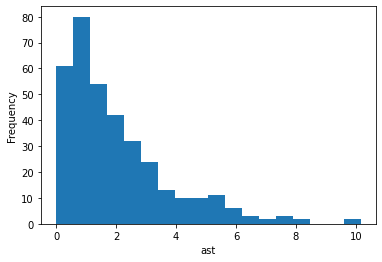

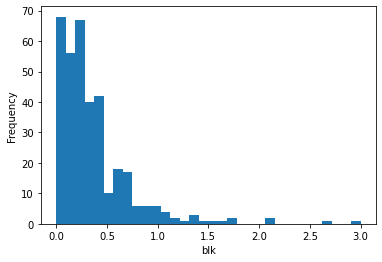

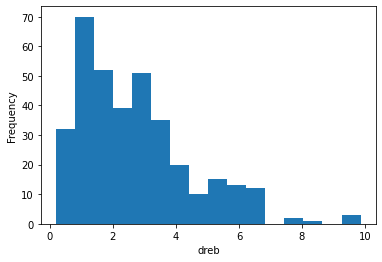

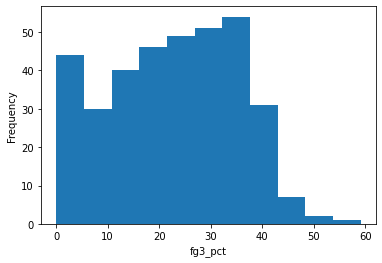

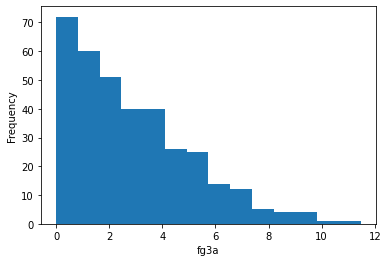

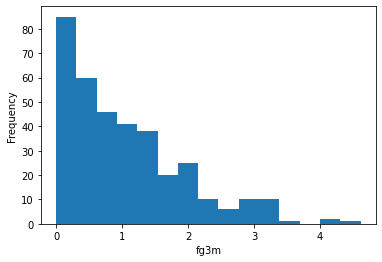

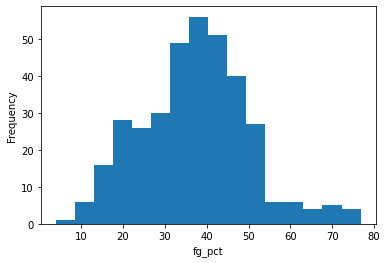

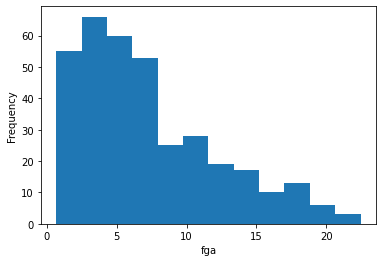

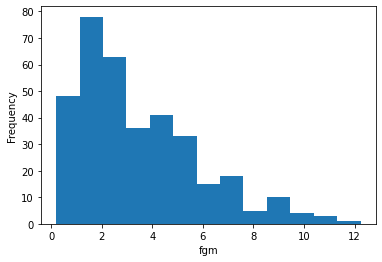

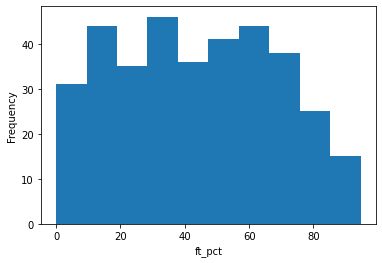

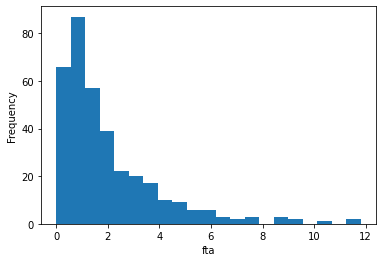

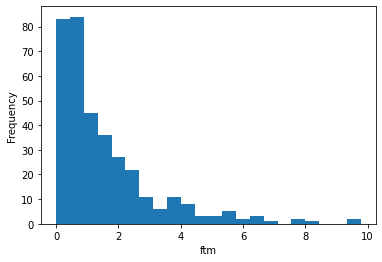

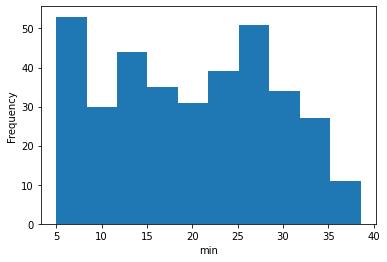

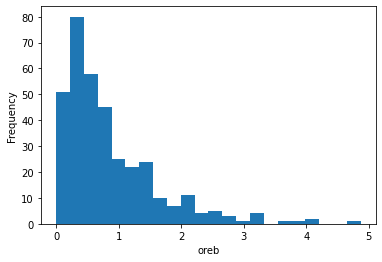

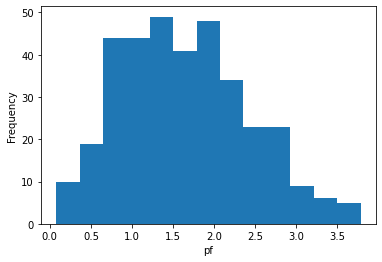

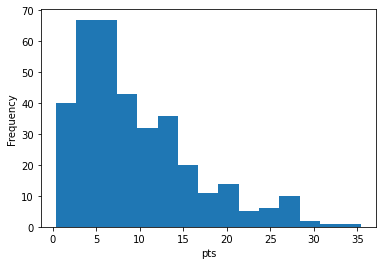

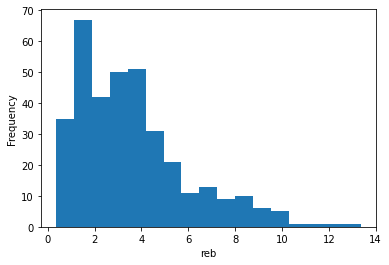

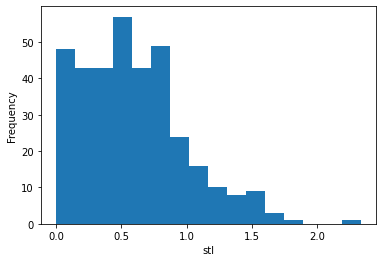

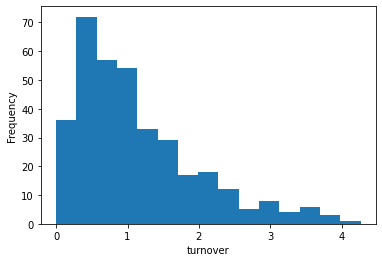

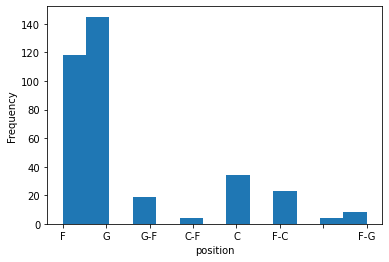

In [52]:
for column in stats_and_position_gt_5.columns:
    plt.hist(stats_and_position_gt_5[column], bins='auto')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

These histograms provide good information about our data, for example:
1. Most variables exhibit positive skewness, indicating a longer tail on the right side of the distribution. However, variables such as Ft, Fg, and Fg3 percentages do not appear to be skewed, and the Minutes Played variable also shows no skewness.
2. The Fg and Fg3 percentages resemble a normal distribution, indicating that the majority of players have shooting percentages around 45% and 30%, respectively. And we cannot avoid the fact that almost 40 players have a Fg3 close to 0%. They probably play as center, because centers have a role focused on defense, rebounding, and scoring closer to the basket.
3. By far, the majority of players exclusively play as either Forwards or Guards. With almost 80 players of difference, the Center position has the next highest number of players.

Now, it is time to see those players with 0% Fg3.

In [53]:
players_gt_5[players_gt_5['fg3_pct'] == 0]

,full_name,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,position
17,Andre Drummond,0.600000,0.266667,3.733333,0.0,0.000000,0.0,49.626667,3.333333,2.000000,...,1.666667,0.800000,11.933333,1.466667,1.466667,4.800000,5.200000,0.666667,0.866667,C
29,Bam Adebayo,2.800000,0.466667,6.533333,0.0,0.066667,0.0,46.586667,13.933333,7.600000,...,5.133333,4.000000,30.866667,2.600000,2.400000,19.200000,9.133333,0.866667,2.400000,C-F
30,Ben Simmons,4.076923,0.076923,3.615385,0.0,0.000000,0.0,40.007692,4.461538,2.615385,...,0.692308,0.000000,17.384615,0.923077,1.923077,5.230769,4.538462,1.000000,1.384615,G-F
32,Bismack Biyombo,0.687500,0.937500,2.125000,0.0,0.000000,0.0,49.481250,2.375000,1.625000,...,1.312500,0.312500,12.437500,1.125000,1.875000,3.562500,3.250000,0.312500,0.625000,C
42,Brandon Clarke,0.857143,0.428571,5.142857,0.0,0.000000,0.0,75.521429,6.714286,4.928571,...,2.857143,2.214286,20.357143,1.857143,2.571429,12.071429,7.000000,0.714286,1.071429,F
47,Bruno Fernando,0.600000,0.600000,1.866667,0.0,0.066667,0.0,38.500000,2.466667,1.266667,...,1.333333,0.800000,9.866667,1.333333,2.266667,3.333333,3.200000,0.200000,0.466667,F
63,Charles Bassey,0.642857,0.714286,2.142857,0.0,0.000000,0.0,42.142857,2.071429,1.500000,...,0.714286,0.571429,10.000000,1.571429,1.500000,3.571429,3.714286,0.214286,0.571429,G
74,Clint Capela,0.285714,0.500000,3.428571,0.0,0.000000,0.0,35.571429,4.428571,3.071429,...,0.928571,0.642857,13.571429,2.285714,1.357143,6.785714,5.714286,0.285714,0.571429,C
88,Damian Jones,0.062500,0.375000,1.125000,0.0,0.125000,0.0,17.500000,0.937500,0.625000,...,0.625000,0.500000,5.312500,0.562500,0.312500,1.750000,1.687500,0.125000,0.187500,C
91,Daniel Gafford,0.666667,1.733333,3.466667,0.0,0.000000,0.0,75.086667,5.533333,4.200000,...,2.600000,1.533333,20.466667,2.333333,2.466667,9.933333,5.800000,0.400000,0.866667,F


As expected, most players with 0% Fg3 are centers.

#### Skewness and Kurtosis

In [54]:
skewness = stats_gt_5.apply(pd.Series.skew)
print("Skewness:")
print(skewness)

Skewness:
ast         1.598906
blk         2.777012
dreb        1.143338
fg3_pct    -0.165530
fg3a        0.921274
fg3m        1.128740
fg_pct      0.213799
fga         0.966477
fgm         1.073417
ft_pct      0.063254
fta         2.030408
ftm         2.071296
min         0.048289
oreb        1.903347
pf          0.366544
pts         1.154352
reb         1.207018
stl         0.845565
turnover    1.229979
dtype: float64


It would be good to summarize this part.
- Skewness between -0.5 and 0.5: Ft,Fg, and Fg3 percentages are in this range, this suggests a relatively small departure from symmetry, but it does not imply perfect symmetry. Minutes played and Personal Fouls will not be interpreted because it does not make sense to interpret the symmetry for them.
- Skewness greater than 1: This section will focus only on Points, Assists, Rebounds, Turnovers and Blocks per game. Blocks per game has skewness greater than 2; this is the most skewed variable, and it is positive, indicating a strong right-skew. The other variables have skewness greater than 1 but less than 2, indicating they are right-skewed as well, although not to the same extent as Blocks.  

In [55]:
kurtosis = stats_gt_5.apply(pd.Series.kurtosis)
print("Kurtosis:")
print(kurtosis)

Kurtosis:
ast          2.859328
blk         11.584238
dreb         1.346535
fg3_pct     -0.738159
fg3a         0.510468
fg3m         1.069545
fg_pct       0.239207
fga          0.197225
fgm          0.711926
ft_pct      -1.036144
fta          4.991154
ftm          5.220513
min         -1.157510
oreb         4.484051
pf          -0.356154
pts          0.924418
reb          1.363091
stl          0.785739
turnover     1.103999
dtype: float64


This part will have 3 sections:
- Leptokurtic: Blocks has a kurtosis of 9, indicating a very significant peak or excess kurtosis, which means the distribution is heavily concentrated around its mean (0.364) with a heavy tail. Also it has a high proportion of extreme values or outliers. This can be seen in its histogram, it has a very pronounced peak and it is around the mean then it suddenly starts to drop.

- Mesokurtic: Assists has a kurtosis of 2.85, which is slightly smaller than 3 (the kurtosis of a normal distribution). This indicates it has a distribution that is more peaked with heavier tails, but the departure is not as pronounced as in Blocks. Also, it is good to say that in the assists' histogram it is concentrated on a value around 1, but it is less than the mean(2.041).

- Platykurtic: Minutes has a kurtosis of -1.15, can still have peaked values, although less pronounced and a broader distribution of the data. I previously stated that I wouldn't interpret minutes, but I did it to show how can be interpreted a kurtosis of less than -1.

### Finding outliers on players that played 5 or more minutes on average.

Outliers for ast:
[ 7.          6.61538462  7.          6.71428571  7.71428571  5.92857143
 10.15384615  6.125       8.17647059  6.         10.14285714  6.33333333
  7.5625      8.14285714  7.625     ]


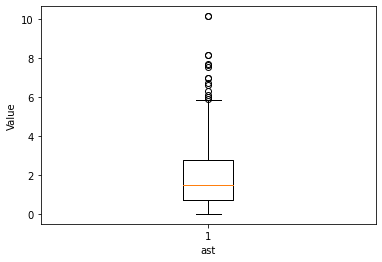

Outliers for blk:
[1.06666667 2.13333333 1.         1.47058824 1.73333333 1.07142857
 1.         1.0625     3.         1.06666667 1.76923077 1.
 1.33333333 1.6        1.13333333 1.5        1.13333333 2.69230769
 1.         1.35714286 1.3125     1.28571429 2.13333333]


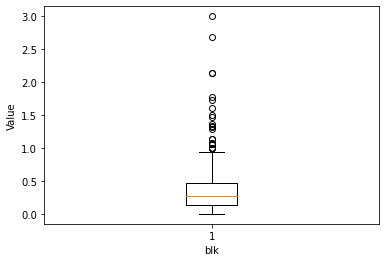

Outliers for dreb:
[9.57142857 8.46666667 7.92307692 9.6        9.85714286 7.73333333]


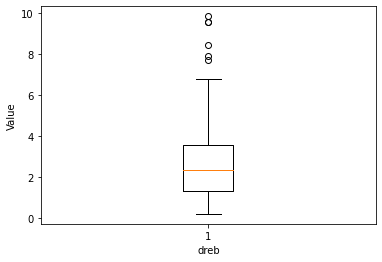

Outliers for fg3_pct:
[]


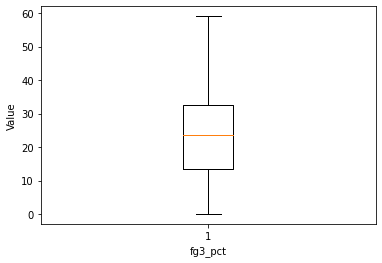

Outliers for fg3a:
[ 9.38461538 11.46153846  9.          9.4         9.06666667  9.33333333
  9.86666667]


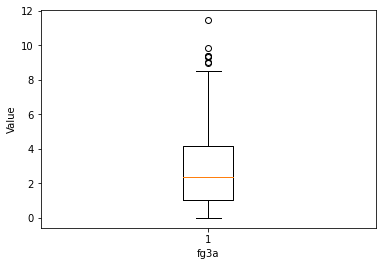

Outliers for fg3m:
[3.61538462 3.28571429 4.25       4.61538462 3.33333333 3.26666667
 3.29411765 3.26666667 3.35294118 4.2        3.3125    ]


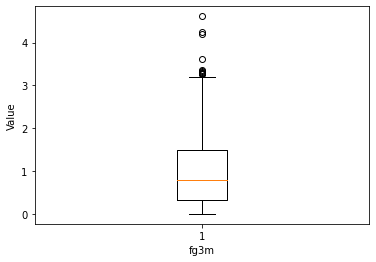

Outliers for fg_pct:
[75.52142857 75.08666667 72.69230769 76.74      ]


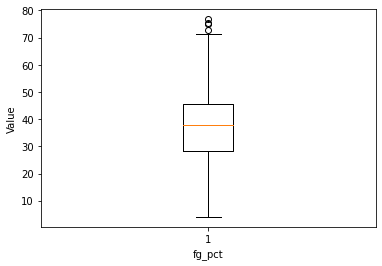

Outliers for fga:
[22.28571429 20.71428571 22.46153846 19.93333333 20.125      19.94117647
 20.06666667]


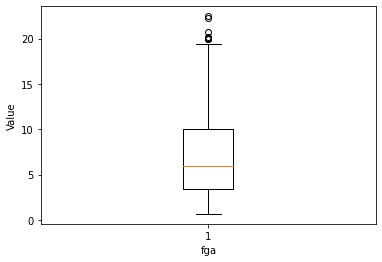

Outliers for fgm:
[ 9.93333333 10.5        12.23076923 10.875      10.35294118 11.21428571]


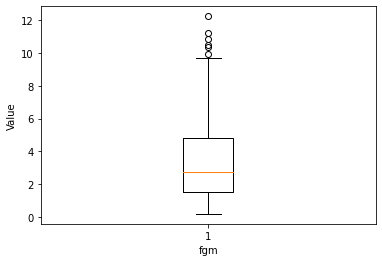

Outliers for ft_pct:
[]


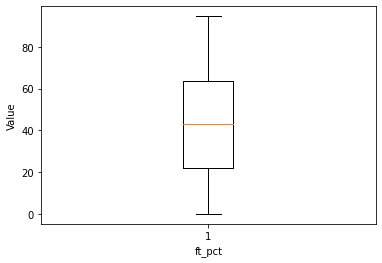

Outliers for fta:
[ 6.53333333  5.875       8.53333333  5.92857143 11.8         6.14285714
  6.66666667  5.84615385  5.78571429  7.71428571 11.38461538  6.46666667
  8.6         6.8         9.23529412  7.57142857  7.33333333  9.46666667
 10.57142857  7.          8.8       ]


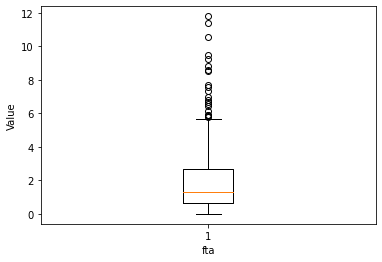

Outliers for ftm:
[4.6        5.4375     5.38461538 7.66666667 8.13333333 4.64285714
 5.26666667 5.         6.42857143 9.76923077 5.73333333 6.46666667
 5.15384615 5.46666667 4.46666667 6.94117647 5.78571429 5.73333333
 7.6        9.57142857 6.14285714 6.26666667]


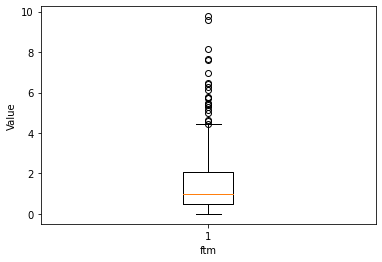

Outliers for min:
[]


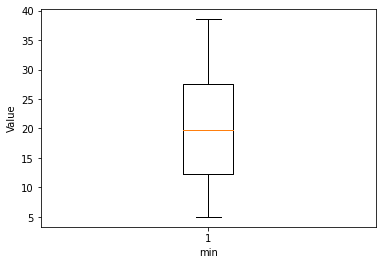

Outliers for oreb:
[2.86666667 2.6        2.8        2.5        3.78571429 2.6
 3.2        3.75       2.46666667 2.73333333 3.         2.38461538
 3.13333333 4.         4.86666667 2.42857143 3.28571429 2.53333333
 4.07142857 3.13333333]


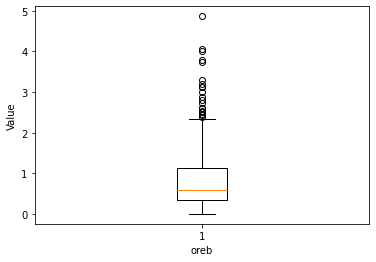

Outliers for pf:
[3.78571429]


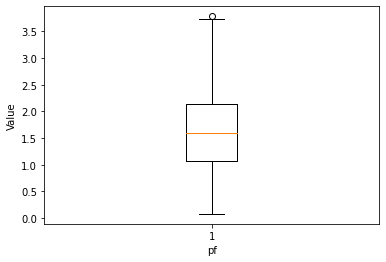

Outliers for pts:
[26.92307692 28.66666667 28.35714286 27.92857143 35.38461538 26.8
 28.33333333 26.15384615 27.3125     30.94117647 29.21428571 28.33333333
 28.35714286]


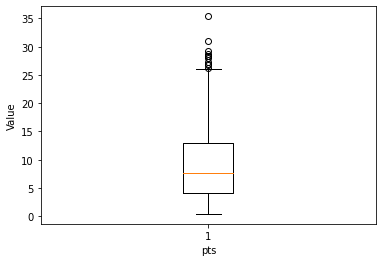

Outliers for reb:
[ 9.13333333  9.6        13.35714286 10.66666667  9.9375      9.92307692
  9.4        11.4         9.4         9.625      10.06666667 12.28571429
  9.26666667  8.86666667  9.14285714]


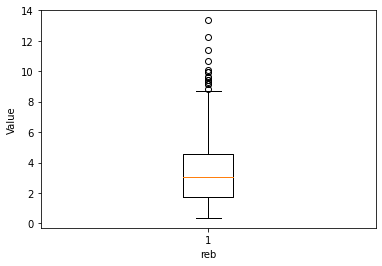

Outliers for stl:
[2.33333333 1.76923077 1.73333333]


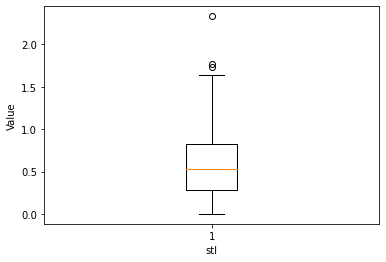

Outliers for turnover:
[3.46666667 3.2        3.46666667 3.92307692 3.53846154 3.06666667
 4.26666667 3.61538462 3.73333333 3.33333333 3.17647059 3.78571429
 3.28571429 3.5        3.46666667]


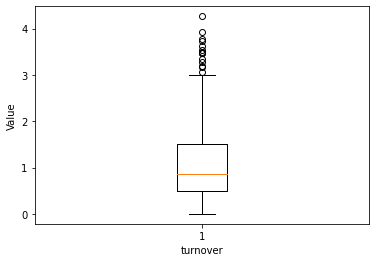

In [56]:
for column in stats_gt_5.columns:
    boxplot = plt.boxplot(stats_gt_5[column])
    outliers = [flier.get_ydata() for flier in boxplot['fliers']]
    if outliers:
        print(f"Outliers for {column}:")
        for outlier in outliers:
            print(outlier)
    else:
        print(f"No outliers for {column}")
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

Now, it's possible to visualize a boxplot and its outlier values. With this, we can reaffirm previous statements:
- Blocks do have several outliers, confirming our earlier observation.
- Assists have outliers but less than Blocks.
- Minutes per game does not exhibit any outliers.
- Fg3_pct, which had a histogram suggesting a normal distribution, is further supported by the absence of outliers.

## Correlation

In [57]:
stats_gt_5.corr()

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
ast,1.000000,0.035553,0.460150,0.413061,0.511852,0.489150,0.261796,0.709830,0.683106,0.580100,0.614507,0.630734,0.667461,0.057976,0.386897,0.697630,0.367658,0.597006,0.802250
blk,0.035553,1.000000,0.518084,-0.008864,-0.055570,-0.034110,0.508258,0.186285,0.291751,0.239497,0.270962,0.225801,0.309760,0.545251,0.456406,0.255216,0.569827,0.164388,0.190290
dreb,0.460150,0.518084,1.000000,0.305176,0.284603,0.288283,0.661358,0.640298,0.730862,0.595687,0.644626,0.601168,0.723995,0.649570,0.653215,0.697547,0.969036,0.467282,0.617613
fg3_pct,0.413061,-0.008864,0.305176,1.000000,0.695424,0.746085,0.301340,0.553508,0.503247,0.556106,0.280981,0.319668,0.628198,-0.146183,0.376550,0.530687,0.183872,0.456371,0.455811
fg3a,0.511852,-0.055570,0.284603,0.695424,1.000000,0.970261,0.129065,0.768627,0.649370,0.628275,0.393754,0.442627,0.685219,-0.210611,0.310151,0.692972,0.147352,0.490982,0.573251
fg3m,0.489150,-0.034110,0.288283,0.746085,0.970261,1.000000,0.169707,0.727768,0.635780,0.604941,0.357140,0.406471,0.667188,-0.195180,0.313944,0.678713,0.155153,0.482257,0.542813
fg_pct,0.261796,0.508258,0.661358,0.301340,0.129065,0.169707,1.000000,0.404594,0.526570,0.540256,0.394429,0.353822,0.621322,0.631365,0.676194,0.478591,0.706407,0.402979,0.397107
fga,0.709830,0.186285,0.640298,0.553508,0.768627,0.727768,0.404594,1.000000,0.969813,0.804231,0.801536,0.819169,0.867196,0.165248,0.533806,0.976666,0.539063,0.616880,0.853706
fgm,0.683106,0.291751,0.730862,0.503247,0.649370,0.635780,0.526570,0.969813,1.000000,0.787756,0.834241,0.837960,0.858146,0.295698,0.578147,0.990211,0.650083,0.602533,0.848247
ft_pct,0.580100,0.239497,0.595687,0.556106,0.628275,0.604941,0.540256,0.804231,0.787756,1.000000,0.675533,0.708845,0.834011,0.253177,0.627055,0.805525,0.533800,0.573515,0.709686


At first, you can fear about all the data that is shown, but this part will be focused only on points, so don't worry. Points are the most important thing in basketball and with this correlation matrix, it's possible to identify which variables are positively or negatively associated with points. It's time to highlight some aspects:
- Assists, rebounds, and steals have a moderate positive correlation (0.6-0.69). If you made many assists, it means you had the ball on many occasions, resulting in some FGAs. This logic applies to rebounds and steals as well. In the case of rebounds, it is not as high as assists because you can grab a defensive rebound and pass it to the player who is in charge of dribbling. In the case of steals, in most occasions, the player who steals the ball tries to finish the play, but this does not happen every time. The player can lose the ball, pass it, or miss the shot.
- Fg, Fg3 and Fta have high positive correlation, it is not a surprise , actually is very logic. The more you shoot the ball, the more points you will have. It's not something new at all.
- Funny things to notice are the weak positive correlation of blocks and the very strong correlation of turnovers. Blocks have been highlighted on many sections, and it is kind of disappointing  to see it is not very correlated to Points, this may be caused because Blocks are part of the defense, but not the offense. The great correlation of Turnovers can have an explanation, big stars tend to have more the ball, so the rival will defend those players better causing turnovers for the star.

Let's plot it.

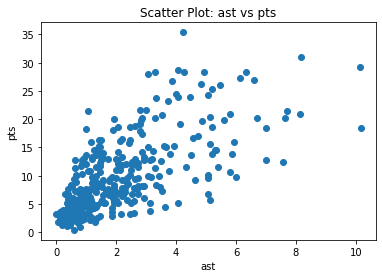

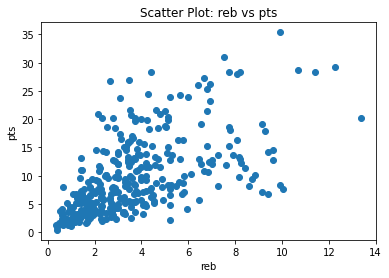

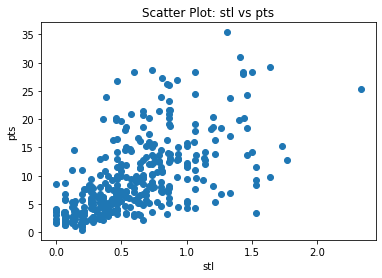

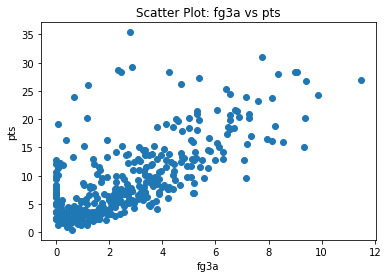

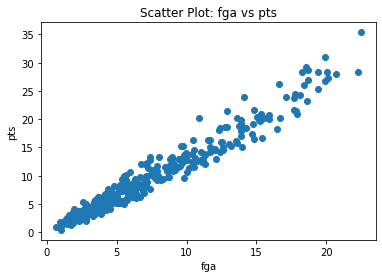

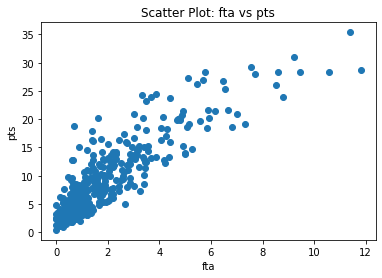

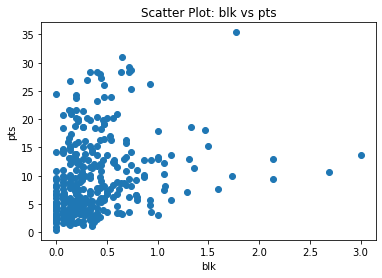

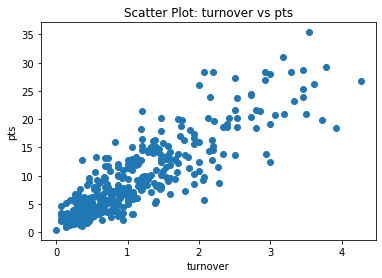

In [58]:
target_column = 'pts'

support_columns = ['ast', 'reb', 'stl', 'fg3a', 'fga', 'fta', 'blk', 'turnover']

for column in support_columns:
    plt.scatter(stats_gt_5[column], stats_gt_5[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.title(f'Scatter Plot: {column} vs {target_column}')
    plt.show()

Now, it is more clear the relation between those variables. Turnovers and FGa are the ones with most clear relation with Points. The less correlation two variables have, the graphic will be less linear. With this view, it's clearer to see the concentration and behavior of some variables.

In conclusion, this descriptive project about NBA data has provided valuable insights into various aspects of the game. Through the analysis of different variables, we have uncovered interesting patterns and relationships among the players' performance metrics. Here are the key findings:

- Player Distribution and Playing Time: We observed that a significant number of players, 150 to be precise, have played less than 5 minutes per game in a 31-day period.

- Distribution Characteristics: Most variables exhibited positive skewness, indicating a longer tail on the right side of the distribution. However, some variables, such as field goal percentages (Fg, Fg3) displayed a more symmetrical distribution.

- Correlation Analysis: Through the correlation matrix, we identified several interesting relationships. Assists, rebounds, and steals showed a moderate positive correlation with points, suggesting their influence on scoring. Additionally, there was a strong positive correlation among field goals made (Fgm), three-point field goals made (Fg3m), and free throw attempts (Fta), indicating that players who attempt more shots tend to score more points.

- Position Distribution: The majority of players exclusively played as either forwards or guards, with a significant difference in numbers. The center position had the next highest number of players.

- Notable Observations: Blocks displayed a relatively weak positive correlation with points, which suggests that shot-blocking alone may not strongly contribute to a player's scoring output. This could be due to the defensive nature of blocks, which primarily prevent the opposing team from scoring rather than directly contributing to a player's own point production. On the other hand, turnovers exhibited a strong positive correlation with points, indicating that a higher number of turnovers may be associated with increased scoring. Star players often handle the ball more frequently and take on more aggressive offensive plays, which can lead to both higher scoring and a higher likelihood of turnovers. 

- Outliers: Blocks were found to have several outliers, indicating exceptional performances in shot-blocking. Assists also had many outliers, although in a smaller proportion. However, minutes per game did not exhibit any outliers, highlighting its consistent distribution.

Overall, this descriptive project has shed light on various aspects of NBA data, providing valuable insights into player performance, relationships between variables, and distribution characteristics. These findings can serve as a foundation for further analysis and exploration of the dataset.